<a href="https://colab.research.google.com/github/navyagona/Bootcamp_2K24/blob/main/customer_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Customer churn
Customer churn, also known as customer loss, occurs when users discontinue a service. It's crucial for companies as retaining current users is more cost-effective than acquiring new ones.

 Studying churn helps companies figure out why users leave and create plans to retain them. Lowering churn rates boosts user satisfaction and enhances profitability.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Load Data

In [14]:
import pandas as pd
df = pd.read_csv(r"/WA_Fn-UseC_-Telco-Customer-Churn.csv")

##Study Data

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


df.describe() method provides a summary of statistics for the numerical columns in our dataset

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


df.info() method in pandas provides a concise summary of a DataFrame, including the index dtype and column dtypes, non-null values, and memory usage. This method is particularly useful for getting a quick overview of dataset and identifying columns with missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Converting the TotalCharges column to a numerical type to handle any issues during the conversion.

In [18]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

checking for null values

In [19]:
# Check for null values
null_values = df.isnull().sum()
null_values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

##HANDLE NULL VALUES AND OUTLIERS

 we will fill missing values in the TotalCharges column with zero and then verify that there are no more null values.

In [20]:
# Fill missing values in 'TotalCharges' with the median value
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Verify there are no more null values
null_values_after = df.isnull().sum()
null_values_after

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

###outliers

In [30]:
import pandas as pd
import numpy as np

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    if not outliers.empty:
        print(f'Outliers in {column} using IQR:')
        print(outliers)
    else:
        print(f'No outliers in {column} using IQR')

# Function to detect outliers using Z-score
def detect_outliers_zscore(df, column):
    threshold = 3
    mean = np.mean(df[column])
    std = np.std(df[column])
    outliers = df[(df[column] < mean - threshold * std) | (df[column] > mean + threshold * std)]
    if not outliers.empty:
        print(f'Outliers in {column} using Z-score:')
        print(outliers)
    else:
        print(f'No outliers in {column} using Z-score')

# Detect outliers in 'tenure', 'MonthlyCharges', and 'TotalCharges'
for column in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    detect_outliers_iqr(df, column)
    detect_outliers_zscore(df, column)


No outliers in tenure using IQR
No outliers in tenure using Z-score
No outliers in MonthlyCharges using IQR
No outliers in MonthlyCharges using Z-score
No outliers in TotalCharges using IQR
No outliers in TotalCharges using Z-score


##Exploratory Data Analysis (EDA)

This code calculates the churn rate by dividing the number of customers who churned (those with 'Yes' in the 'Churn' column) by the total number of customers in the dataset.
It then prints the churn rate as a percentage with two decimal places.

In [ ]:
total_customers = len(df)
churned_customers = df['Churn'].value_counts().get('Yes', 0)
churn_rate = churned_customers / total_customers

print(f"Churn Rate: {churn_rate:.2%}")

Churn Rate: 26.54%


###Univariate Analysis
Univariate analysis involves the examination of each variable in a dataset individually. It helps to understand the distribution, central tendency, and spread of each variable

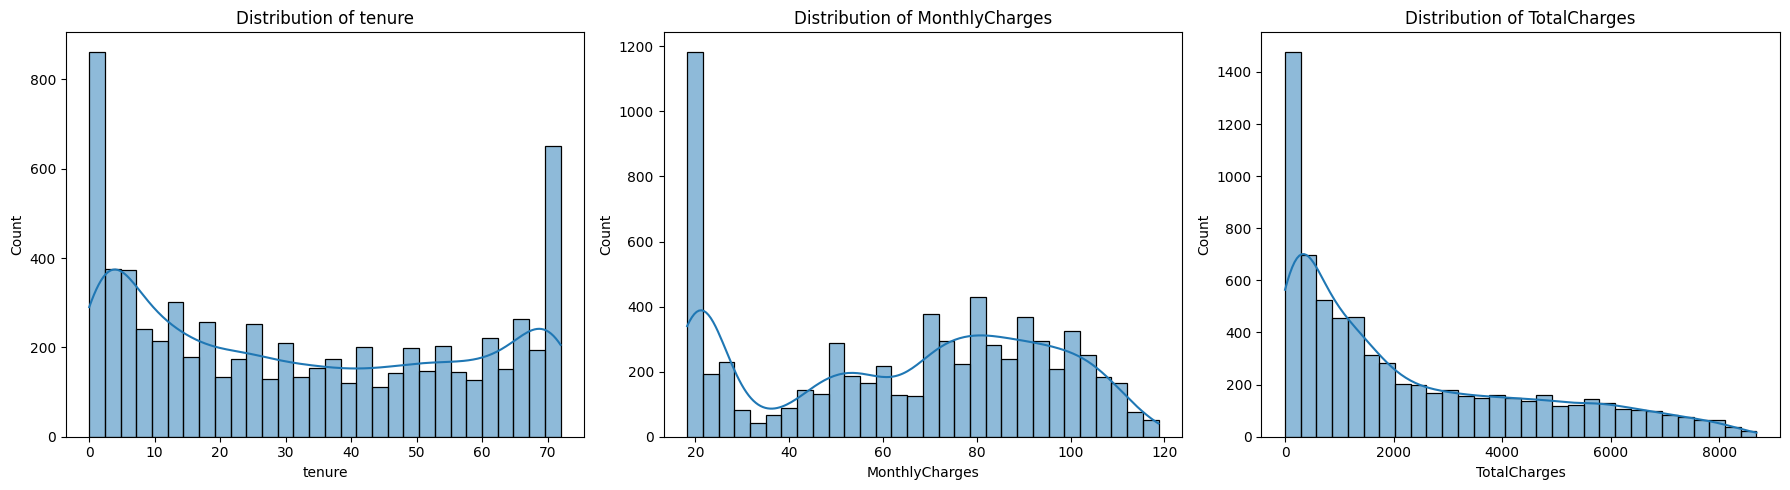

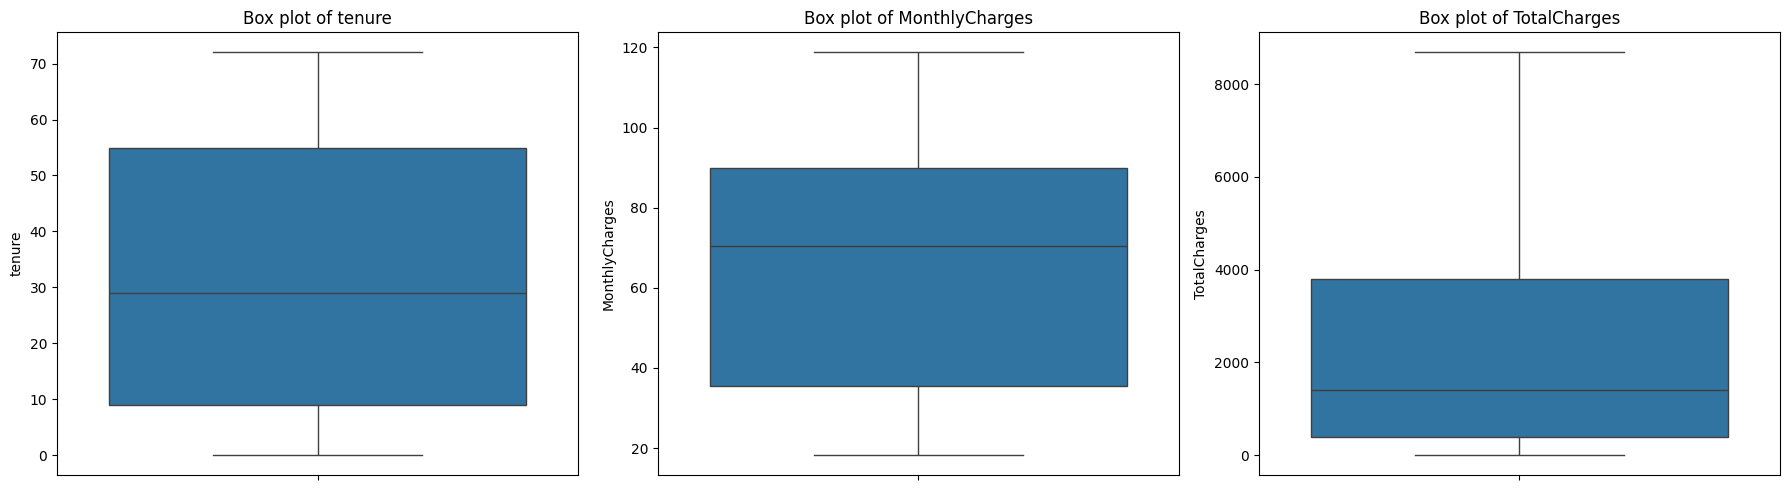

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical and categorical columns
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                       'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# 2. Distribution Plots for Numerical Variables
plt.figure(figsize=(18, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# 3. Box Plots for Numerical Variables
plt.figure(figsize=(18, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=column, data=df)
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()



### Bivariate Analysis
Bivariate analysis involves examining the relationship between two variables. This type of analysis helps in understanding the correlation, causation, and dependency between variables. For the Telco Customer Churn dataset, we can perform bivariate analysis using various techniques such as scatter plots, box plots.


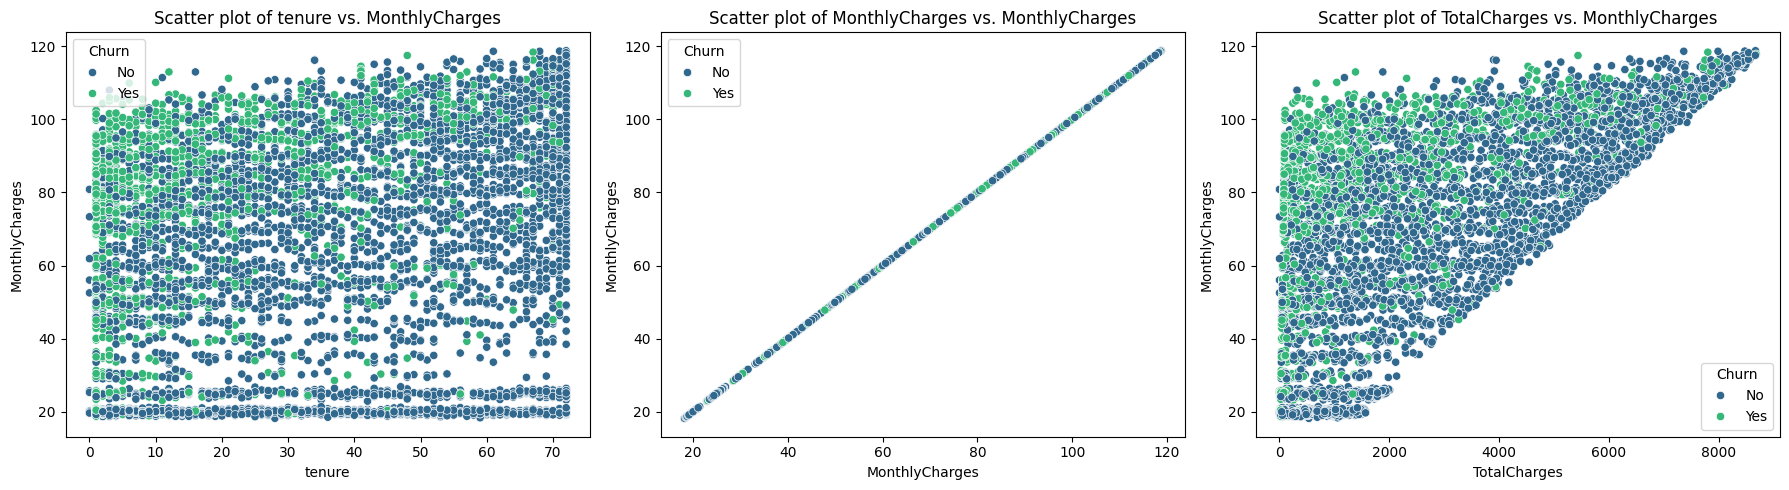

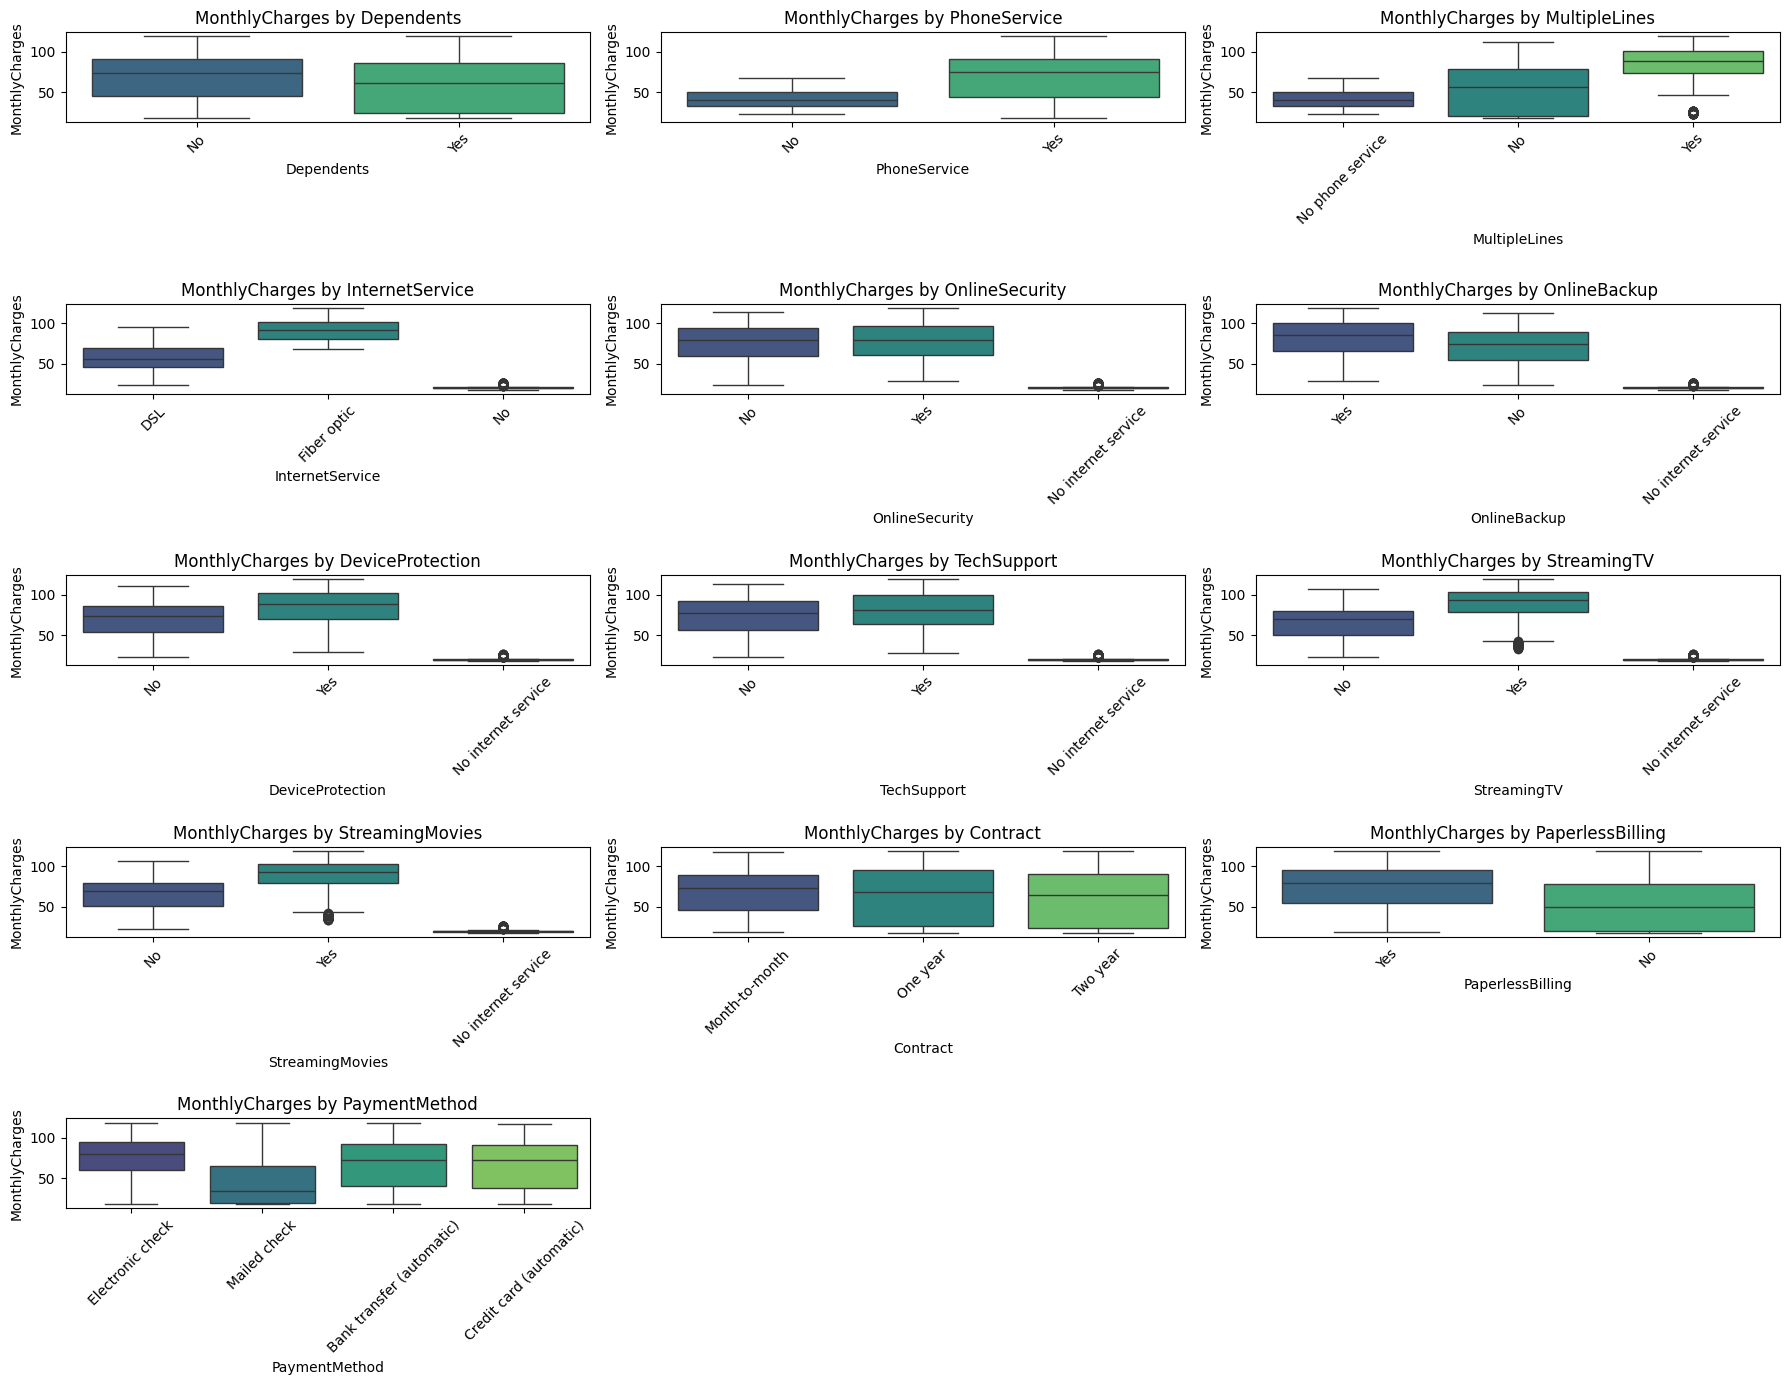

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical and categorical columns after removal
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_columns = ['Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                       'PaymentMethod', 'Churn']

# 1. Scatter Plot for Numerical Variables
plt.figure(figsize=(18, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=column, y='MonthlyCharges', hue='Churn', data=df, palette='viridis')
    plt.title(f'Scatter plot of {column} vs. MonthlyCharges')
plt.tight_layout()
plt.show()

# 2. Box Plot for Categorical vs. Numerical Variables
plt.figure(figsize=(18, 15))
for i, column in enumerate(categorical_columns[:-1], 1):
    plt.subplot(6, 3, i)
    sns.boxplot(x=column, y='MonthlyCharges', data=df, hue=column, palette='viridis', legend=False)
    plt.title(f'MonthlyCharges by {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




This code creates a count plot (sns.countplot) showing the distribution of values in the 'Churn' column from the DataFrame df, displaying the count of each category ('Yes' and 'No') in a bar chart format.

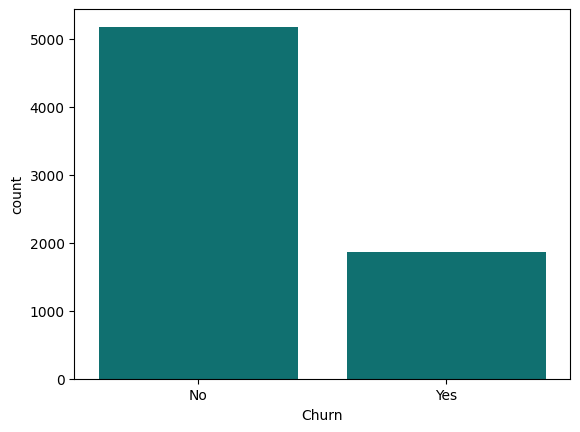

In [ ]:
sns.countplot(x='Churn', data=df, color='teal')
plt.show()